In [27]:
import os

import matplotlib.pyplot as plt
from matplotlib.image import imread, imsh
import pandas as pd
import numpy as np
from PIL import Image
from IPython.display import display

%load_ext autoreload

%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
dataset_file = pd.read_csv("../data/final_dataset.csv")
dataset_file.head()

,sequence,image_sequence,file,label,site,date,camera,sequence_image_count,has_animal,set
0,2,image1,290716114012001a1116.JPG,BIRD,001a,7/29/2016 11:40,111,3,1,train
1,12,image1,100816090812001a1111.JPG,BIRD,001a,8/10/2016 9:08,111,3,1,train
2,17,image1,180516121622001a1602.JPG,BIRD,001a,5/18/2016 12:16,160,3,1,train
3,18,image1,260416120224001a1601.JPG,BIRD,001a,4/26/2016 12:02,160,3,1,train
4,20,image1,160516023810001a1606.JPG,CAT,001a,5/16/2016 2:38,160,3,1,test


In [3]:
dataset_file['time'] = pd.to_datetime(dataset_file.date).dt.time

In [4]:
train_subset = dataset_file[dataset_file.set == 'train']
background_subset = train_subset[train_subset.has_animal == 0]

In [5]:
cam_loc_1 = background_subset[((background_subset.camera == '111') & (background_subset.site=='001a'))]

In [19]:
(background_subset.groupby(['site', 'camera']).count()//3).reset_index()

,site,camera,sequence,image_sequence,file,label,date,sequence_image_count,has_animal,set,time
0,001a,111,69,69,69,69,69,69,69,69,69
1,001a,160,1,1,1,1,1,1,1,1,1
2,001a,s07,3,3,3,3,3,3,3,3,3
3,001a,s46,19,19,19,19,19,19,19,19,19
4,001b,923,14,14,14,14,14,14,14,14,14
...,...,...,...,...,...,...,...,...,...,...,...
603,956,590,31,31,31,31,31,31,31,31,31
604,956,L17,8,8,8,8,8,8,8,8,8
605,985,330,18,18,18,18,18,18,18,18,18
606,985,S18,14,14,14,14,14,14,14,14,14


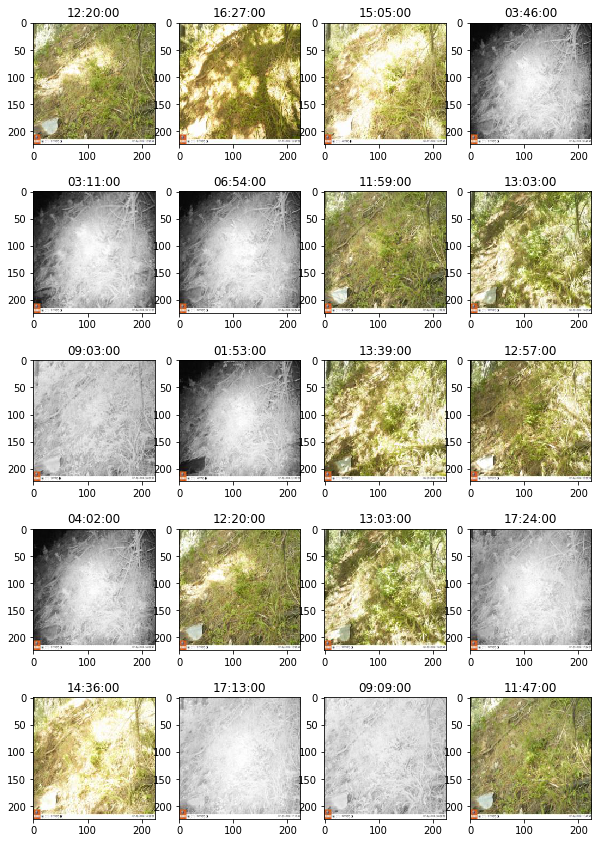

In [21]:
plt.figure(figsize=(10, 15))
for idx, filename in cam_loc_1.sample(20).reset_index(drop=True).iterrows():
    ax = plt.subplot(5, 4, idx + 1)
    plt.imshow(imread(os.path.join('../data/images/images-resized', filename.file)))
    plt.title(filename.time)

### Site camera combo analysis

In [24]:
all_site_cam_combo = list(set(map(lambda a: (a[0], a[1]), train_subset[['site', 'camera']].values)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


014c 971


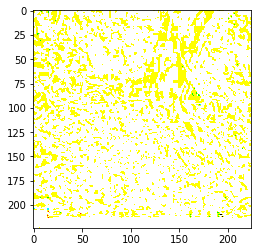

In [39]:
for site, camera in all_site_cam_combo:
    print(site, camera)
    background_list = train_subset[(train_subset.site == site) & 
                                        (train_subset.camera == camera) & 
                                        (train_subset.has_animal == 0)]
    images = []
    for filename in background_list.file:
        images.append(imread(os.path.join('../data/images/images-resized', '190916080856014c9711.JPG')))
        
    median_image = np.median(np.array(images), axis=0)
    plt.imshow(median_image)
    break

(224, 224, 3)